In [1]:
import os
import numpy as np
import gemmi
import matplotlib.pyplot as plt
import seaborn as sns 
from tqdm import tqdm
def get_chain_length_distribution(st):
    chain_lengths = []
    for chain in st[0]:
        chain_lengths.append(len(chain))
    
    return chain_lengths

In [2]:
parent_folder_predictions = "/home/abharadwaj1/papers/elife_paper/figure_information/data/model_angelo_predictions_new_version"

num_atoms_using_deposited = {}
num_atoms_using_hybrid = {}
num_atoms_using_unsharpened = {}

num_atoms_using_deposited_raw = {}
num_atoms_using_hybrid_raw = {}
num_atoms_using_unsharpened_raw = {}

num_residues_using_deposited = {}
num_residues_using_hybrid = {}
num_residues_using_unsharpened = {}

num_residues_using_deposited_raw = {}
num_residues_using_hybrid_raw = {}
num_residues_using_unsharpened_raw = {}

chain_lengths_using_deposited = {}
chain_lengths_using_hybrid = {}
chain_lengths_using_unsharpened = {}

def get_num_residues(structure):
    num_residues = 0
    for chain in structure[0]:
        num_residues += len(chain)
    return num_residues

for emdb_pdb in tqdm(os.listdir(parent_folder_predictions)):
    # make sure emdb_pdb is a string
    if not isinstance(emdb_pdb, str):
        continue
    
    if len(emdb_pdb.split("_")) != 2:
        continue

    emdb, pdb = emdb_pdb.split("_")
    

    emdb_folder = os.path.join(parent_folder_predictions, emdb_pdb)

    # make sure emdb_folder is a folder
    if not os.path.isdir(emdb_folder):
        continue

    model_angelo_predicted_structure_deposited = os.path.join(emdb_folder, f"emd_{emdb}_model_angelo_deposited", f"emd_{emdb}_model_angelo_deposited.cif")
    model_angelo_predicted_structure_hybrid = os.path.join(emdb_folder, f"emd_{emdb}_model_angelo_hybrid", f"emd_{emdb}_model_angelo_hybrid.cif")
    model_angelo_predicted_structure_unsharpened = os.path.join(emdb_folder, f"emd_{emdb}_model_angelo_unsharpened", f"emd_{emdb}_model_angelo_unsharpened.cif")

    model_angelo_predicted_structure_deposited_raw = os.path.join(emdb_folder, f"emd_{emdb}_model_angelo_deposited", f"emd_{emdb}_model_angelo_deposited_raw.cif")
    model_angelo_predicted_structure_hybrid_raw = os.path.join(emdb_folder, f"emd_{emdb}_model_angelo_hybrid", f"emd_{emdb}_model_angelo_hybrid_raw.cif")
    model_angelo_predicted_structure_unsharpened_raw = os.path.join(emdb_folder, f"emd_{emdb}_model_angelo_unsharpened", f"emd_{emdb}_model_angelo_unsharpened_raw.cif")

    # make sure all files exist
    deposited_file_exists = os.path.isfile(model_angelo_predicted_structure_deposited)
    hybrid_file_exists = os.path.isfile(model_angelo_predicted_structure_hybrid)
    unsharpened_file_exists = os.path.isfile(model_angelo_predicted_structure_unsharpened)

    deposited_file_exists_raw = os.path.isfile(model_angelo_predicted_structure_deposited_raw)
    hybrid_file_exists_raw = os.path.isfile(model_angelo_predicted_structure_hybrid_raw)
    unsharpened_file_exists_raw = os.path.isfile(model_angelo_predicted_structure_unsharpened_raw)


    if not (deposited_file_exists and hybrid_file_exists and unsharpened_file_exists) or not (deposited_file_exists_raw and hybrid_file_exists_raw and unsharpened_file_exists_raw):
        continue

    # read in the structures
    deposited_structure = gemmi.read_structure(model_angelo_predicted_structure_deposited)
    hybrid_structure = gemmi.read_structure(model_angelo_predicted_structure_hybrid)
    unsharpened_structure = gemmi.read_structure(model_angelo_predicted_structure_unsharpened)

    deposited_structure_raw = gemmi.read_structure(model_angelo_predicted_structure_deposited_raw)
    hybrid_structure_raw = gemmi.read_structure(model_angelo_predicted_structure_hybrid_raw)
    unsharpened_structure_raw = gemmi.read_structure(model_angelo_predicted_structure_unsharpened_raw)

    # get the number of atoms in each structure
    num_atoms_deposited = deposited_structure[0].count_atom_sites()
    num_atoms_hybrid = hybrid_structure[0].count_atom_sites()
    num_atoms_unsharpened = unsharpened_structure[0].count_atom_sites()

    num_atoms_deposited_raw = deposited_structure_raw[0].count_atom_sites()
    num_atoms_hybrid_raw = hybrid_structure_raw[0].count_atom_sites()
    num_atoms_unsharpened_raw = unsharpened_structure_raw[0].count_atom_sites()

    # get the number of residues in each structure
    num_residues_deposited = get_num_residues(deposited_structure)
    num_residues_hybrid = get_num_residues(hybrid_structure)
    num_residues_unsharpened = get_num_residues(unsharpened_structure)

    num_residues_deposited_raw = get_num_residues(deposited_structure_raw)
    num_residues_hybrid_raw = get_num_residues(hybrid_structure_raw)
    num_residues_unsharpened_raw = get_num_residues(unsharpened_structure_raw)
    
    # get the chain lengths of each structure
    chain_length_dep = get_chain_length_distribution(deposited_structure)
    chain_length_hybrid = get_chain_length_distribution(hybrid_structure)
    chain_length_unsharp = get_chain_length_distribution(unsharpened_structure)

    # add the number of atoms to the dictionary
    num_atoms_using_deposited[emdb_pdb] = num_atoms_deposited
    num_atoms_using_hybrid[emdb_pdb] = num_atoms_hybrid
    num_atoms_using_unsharpened[emdb_pdb] = num_atoms_unsharpened

    num_atoms_using_deposited_raw[emdb_pdb] = num_atoms_deposited_raw
    num_atoms_using_hybrid_raw[emdb_pdb] = num_atoms_hybrid_raw
    num_atoms_using_unsharpened_raw[emdb_pdb] = num_atoms_unsharpened_raw

    
    # add the number of residues to the dictionary
    num_residues_using_deposited[emdb_pdb] = num_residues_deposited
    num_residues_using_hybrid[emdb_pdb] = num_residues_hybrid
    num_residues_using_unsharpened[emdb_pdb] = num_residues_unsharpened

    num_residues_using_deposited_raw[emdb_pdb] = num_residues_deposited_raw
    num_residues_using_hybrid_raw[emdb_pdb] = num_residues_hybrid_raw
    num_residues_using_unsharpened_raw[emdb_pdb] = num_residues_unsharpened_raw
    
    chain_lengths_using_deposited[emdb_pdb] = chain_length_dep
    chain_lengths_using_hybrid[emdb_pdb] = chain_length_hybrid
    chain_lengths_using_unsharpened[emdb_pdb] = chain_length_unsharp
       



100%|██████████| 98/98 [00:41<00:00,  2.38it/s]


/home/abharadwaj1/miniconda3/envs/locscale_dev/lib/python3.7/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


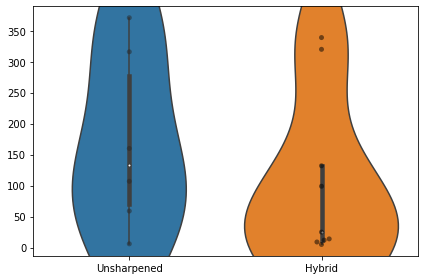

In [3]:
import random

random_emdb_pdb = random.choice(list(num_atoms_using_deposited.keys()))


sns.violinplot(data=[chain_lengths_using_unsharpened[random_emdb_pdb], chain_lengths_using_hybrid[random_emdb_pdb]])
sns.swarmplot(data=[chain_lengths_using_unsharpened[random_emdb_pdb], chain_lengths_using_hybrid[random_emdb_pdb]], color="black", alpha=0.5)
plt.xticks([0, 1], ["Unsharpened", "Hybrid"])
plt.tight_layout()


In [4]:
import pandas as pd
# Create a pandas dataframe from all the data
indices = list(num_atoms_using_deposited.keys())

# columns = num residues, chain lengths 
# group = deposited, hybrid, unsharpened

model_angelo_prediction_unsharpened_df = pd.DataFrame(columns=["emdb", "num_residues", "chain_lengths"])
model_angelo_prediction_hybrid_df = pd.DataFrame(index=indices, columns=["emdb", "num_residues", "chain_lengths"])

model_angelo_prediction_unsharpened_df["emdb"] = indices
model_angelo_prediction_unsharpened_df["num_residues"] = list(num_residues_using_unsharpened.values())
model_angelo_prediction_unsharpened_df["chain_lengths"] = list(chain_lengths_using_unsharpened.values())
# convert chain_lengths to numpy array
model_angelo_prediction_unsharpened_df["chain_lengths"] = model_angelo_prediction_unsharpened_df["chain_lengths"].apply(lambda x: np.array(x))

model_angelo_prediction_hybrid_df["emdb"] = indices
model_angelo_prediction_hybrid_df["num_residues"] = list(num_residues_using_hybrid.values())
model_angelo_prediction_hybrid_df["chain_lengths"] = list(chain_lengths_using_hybrid.values())
# convert chain_lengths to numpy array
model_angelo_prediction_hybrid_df["chain_lengths"] = model_angelo_prediction_hybrid_df["chain_lengths"].apply(lambda x: np.array(x))

model_angelo_prediction_merge = pd.merge(model_angelo_prediction_unsharpened_df, model_angelo_prediction_hybrid_df, on="emdb", suffixes=("_unsharpened", "_hybrid"))




In [5]:
model_angelo_prediction_unsharpened_df.head()

emdb  num_residues                                      chain_lengths
0  7573_6crv          2170  [207, 577, 30, 109, 572, 332, 113, 102, 39, 47...
1  0665_6oa9          1729  [266, 254, 204, 54, 169, 37, 31, 226, 369, 45,...
2  0071_6gve          1463  [19, 78, 19, 18, 21, 21, 19, 117, 45, 60, 10, ...
3  0093_6gyn          1904                     [107, 376, 367, 479, 473, 102]
4  0094_6gyo          1940                      [115, 379, 422, 67, 479, 478]

In [6]:
model_angelo_prediction_merge_long = model_angelo_prediction_merge.__deepcopy__()

In [7]:
unsharpened_identity = ["unsharpened"] * len(num_residues_using_unsharpened)
model_angelo_prediction_unsharpened_df["group"] = unsharpened_identity
model_angelo_prediction_unsharpened_df_melt = model_angelo_prediction_unsharpened_df.melt(id_vars=["emdb", "num_residues", "chain_lengths"], value_vars=["group"])
model_angelo_prediction_unsharpened_df_melt.head()

hybrid_identity = ["hybrid"] * len(num_residues_using_hybrid)
model_angelo_prediction_hybrid_df["group"] = hybrid_identity
model_angelo_prediction_hybrid_df_melt = model_angelo_prediction_hybrid_df.melt(id_vars=["emdb", "num_residues", "chain_lengths"], value_vars=["group"])
model_angelo_prediction_hybrid_df_melt.head()

emdb  num_residues                                      chain_lengths  \
0  7573_6crv          2118   [566, 558, 566, 96, 110, 76, 44, 36, 43, 11, 12]   
1  0665_6oa9          1797  [74, 243, 173, 428, 223, 194, 51, 170, 48, 100...   
2  0071_6gve          2677  [278, 65, 254, 45, 262, 286, 141, 54, 34, 11, ...   
3  0093_6gyn          1892                          [476, 465, 480, 101, 370]   
4  0094_6gyo          1910                           [417, 477, 480, 64, 472]   

  variable   value  
0    group  hybrid  
1    group  hybrid  
2    group  hybrid  
3    group  hybrid  
4    group  hybrid

In [11]:
model_angelo_prediction_merge_long = pd.concat([model_angelo_prediction_unsharpened_df_melt, model_angelo_prediction_hybrid_df_melt])
model_angelo_prediction_merge_long.head()
# convert chain_lengths to numpy array
model_angelo_prediction_merge_long["chain_lengths"] = model_angelo_prediction_merge_long["chain_lengths"].apply(lambda x: np.array(x))


<AxesSubplot:xlabel='variable', ylabel='chain_lengths_mean'>

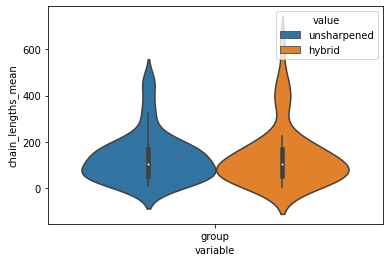

In [33]:
model_angelo_prediction_merge_long["chain_lengths_mean"] = model_angelo_prediction_merge_long["chain_lengths"].apply(lambda x: np.mean(x))
model_angelo_prediction_merge_long["chain_lengths_std"] = model_angelo_prediction_merge_long["chain_lengths"].apply(lambda x: np.std(x))

# plot a violin plot of the chain lengths mean for hybrid and unsharpened maps 
sns.violinplot(data=model_angelo_prediction_merge_long, x="variable", y="chain_lengths_mean", hue="value", legend=False)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.violinplot(data=model_angelo_prediction_merge_long, split=True, ax=ax, x="emdb", y="chain_lengths")